In [1086]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For running time analysis
import time

## Bubble Sort and Merge Sort: Time-Complexity Analysis
***

In this part we will analyze the time complexity of Bubble sort and Merge sort. 

### Step 1

Implement two sorting functions: [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort) and [merge sort](https://en.wikipedia.org/wiki/Merge_sort). Your functions should take as input a python list (you can assume no duplicates values) and return a sorted python list with the same elements. You can use the built-in function `sorted` to check your implementation. (Don't use numpy in your implementation)


In [642]:
def bubble_sort(values):
    for i in range (len(values)-1):
        for j in range(len(values)-1):
            if values[j] > values[j+1]:
                values[j], values[j+1] = values[j+1], values[j]
    return values

###############################end of code###########################################
x = [1, 99, 18, 2]
bubble_sort(x), sorted(x)

In [643]:
def merge_sort(values): 
  
    if len(values) > 1: 
        
        #split list in 2 and call recursively on each half
        middle = len(values) // 2
        left = values[:middle] 
        right = values[middle:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values = [] 
  
        while len(left) > 0 and len(right) > 0: 
            if left[0] < right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values 

###############################end of code###########################################


z = ([2,4, 3, 1, 3, 5, 100, -5])
merge_sort(z), sorted(z)

### Step 2

In this step you will analyze the running time of each algorithm. Generate 20 random sequences of length $n$ (use `np.random.permutation`) and run bubble sort and merge sort on each random sequence. Next, calculate the average running time of your implementations. Repeat this process for the following lengths: $n \in range(0, 4,000, 100)$ and plot a single figure that describes the average running time as a function of the input length of both algorithms (single figure, single axes but 2 plots, one for each algorithm). Make sure your visualization is clear. Use colors, labels, header, legend and anything else that might improve your visualization in terms of clarity.  
To measure execution time use :
```python
start_time = time.time()
algorithm()
exec_time = time.time() - start_time
```

In [1105]:
def time_it():
    
    #temporary lists to save runtime and then average
    bubble_times = np.zeros(20)
    merge_times = np.zeros(20)
    
    #lists for saving avg time per list lenght
    bubble_avg_times = list()
    merge_avg_times = list() 
    
    for n in range(0, 4000, 100):
        for i in range(20):
            permutation = np.random.permutation(n)
            
            #time mergesort for current permutation
            start_time = time.time()
            merge_sort(permutation.tolist())
            merge_times[i] = time.time() - start_time
            
            #time bubblesort for current permutation
            start_time = time.time()
            bubble_sort(permutation.tolist())
            bubble_times[i] = time.time() - start_time
        
        #calculate averages and save them
        merge_avg_times.append(np.average(merge_times))
        bubble_avg_times.append(np.average(bubble_times))
    return merge_avg_times, bubble_avg_times
    
         
merge_sort_times, bubble_sort_times = time_it()  
print(merge_sort_times)
print(bubble_sort_times)   

[1.2993812561035157e-06, 0.0006069302558898926, 0.0011282682418823243, 0.0017256855964660645, 0.0023006796836853027, 0.003343832492828369, 0.004427170753479004, 0.004650628566741944, 0.005467033386230469, 0.005831217765808106, 0.006095612049102783, 0.007438719272613525, 0.007625603675842285, 0.008729970455169678, 0.009641778469085694, 0.01027820110321045, 0.01122586727142334, 0.011045873165130615, 0.011866068840026856, 0.012509799003601075, 0.013303148746490478, 0.01402745246887207, 0.01543726921081543, 0.015641403198242188, 0.017547595500946044, 0.01768155097961426, 0.01829805374145508, 0.01909635066986084, 0.019510579109191895, 0.021294116973876953, 0.021408939361572267, 0.022214412689208984, 0.022886323928833007, 0.024095070362091065, 0.024628925323486327, 0.02490079402923584, 0.02883092164993286, 0.027412784099578858, 0.028406250476837158, 0.028272294998168947]
[1.6450881958007813e-06, 0.0019517302513122558, 0.006315422058105469, 0.01405245065689087, 0.025693333148956297, 0.0452113

In [1106]:
#save both results into Series
s_1 = pd.Series(data = bubble_sort_times, index =range(0, 4000, 100))
s_2 = pd.Series(data = merge_sort_times, index =range(0, 4000, 100))
d = pd.concat([s_1, s_2], axis= 1)
data = d.rename(columns={0: 'Bubble Sort', 1: 'Merge Sort'})
print(data)

      Bubble Sort  Merge Sort
0        0.000002    0.000001
100      0.001952    0.000607
200      0.006315    0.001128
300      0.014052    0.001726
400      0.025693    0.002301
500      0.045211    0.003344
600      0.068454    0.004427
700      0.089874    0.004651
800      0.117549    0.005467
900      0.131480    0.005831
1000     0.166994    0.006096
1100     0.204425    0.007439
1200     0.235559    0.007626
1300     0.286413    0.008730
1400     0.329361    0.009642
1500     0.388903    0.010278
1600     0.436157    0.011226
1700     0.474782    0.011046
1800     0.530364    0.011866
1900     0.593375    0.012510
2000     0.664535    0.013303
2100     0.730652    0.014027
2200     0.798113    0.015437
2300     0.874607    0.015641
2400     1.031182    0.017548
2500     1.060516    0.017682
2600     1.134811    0.018298
2700     1.221420    0.019096
2800     1.315527    0.019511
2900     1.430940    0.021294
3000     1.510745    0.021409
3100     1.609375    0.022214
3200     1

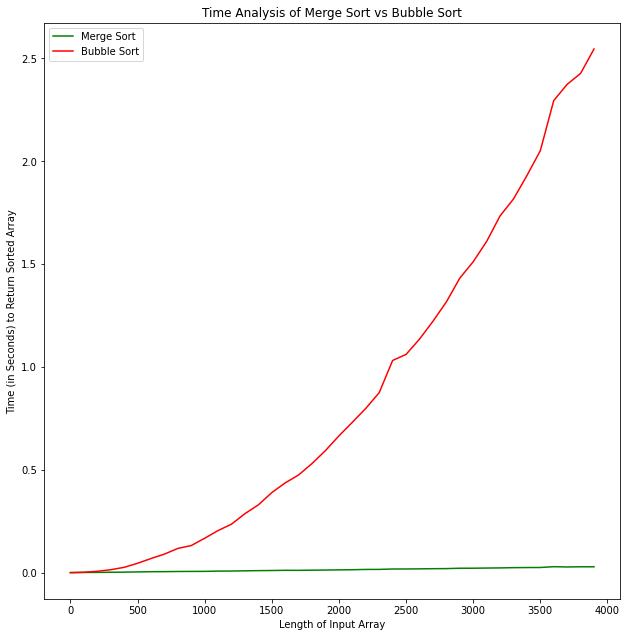

In [1107]:
#plotting time analysis to compare graph to expected results

x = np.arange(0, 4000, 100)

y = data['Bubble Sort']
z = data['Merge Sort']

figure = plt.figure(figsize=(8, 8))
axes = figure.add_axes([0,0,1,1])

axes.plot(x, z, "g", label="Merge Sort")
axes.plot(x, y, "r", label="Bubble Sort")

axes.legend()
plt.title('Time Analysis of Merge Sort vs Bubble Sort')
plt.xlabel('Length of Input Array')
plt.ylabel('Time (in Seconds) to Return Sorted Array');

## Detecting serial killer activity
***

Visit the following [Kaggle page](https://www.kaggle.com/murderaccountability/homicide-reports) and download the `homicide-reports` dataset.

### Visualizations guidelines:

- You can use either `pyplot` or `seaborn` for the visualization.
- Fill free to change the figure size in each plot.
- Set plot title and the axes titles of your plots.
- Use legends when necessary.


### Data preprocessing

1. Start with dropping the numeric identifiers in the data. These are : `Record ID` and `Agency Code`. The data
you will be querying shouldn't contain these columns.

### Data 

In [1036]:
df = pd.read_csv('./homicide_dataset.zip', compression='zip', header=0, sep=',', quotechar='"')
df = df.drop( columns=['Record ID', 'Agency Code'] )

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
df.head()

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [48]:
df.columns #check columns

Index(['Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month',
       'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age',
       'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count', 'Record Source'],
      dtype='object')

__Show the number of incidents (a simple count) in each state using a bar plot, display the bar sorted from highest to lowest. x ticks of the plot should be the states names.__

<BarContainer object of 51 artists>

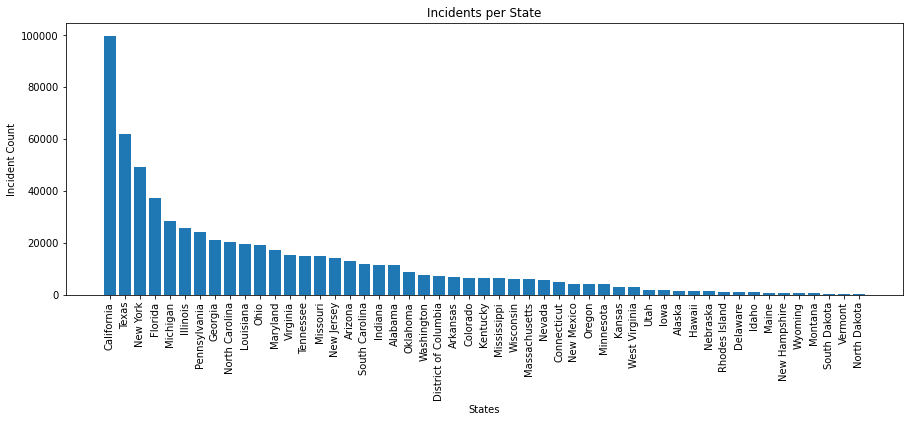

In [1037]:
state_incidents = df.groupby('State')['Incident'].count()

state_incidents = state_incidents.sort_values(ascending=False)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Incident Count')
plt.title('Incidents per State')
plt.bar(x=state_incidents.index, height=state_incidents.values)

__Find the cities with highest number of incidents between the years 1995 - 2000 (Including 95 excluding 00). Plot the top 10 cities trend line : x should be the year and y should be the incidents count. (Each city should have 5 points). Use a single axes for all.__

In [228]:
#Understood as within that certain period of years, which are the cities that have the most incidents.
mask_years = ( df['Year'] >= 1995 ) & ( df['Year'] < 2000 )
top_cities = df[mask_years].groupby(['City'])['Incident'].count().reset_index()
top_cities = top_cities.sort_values(by=['Incident'], ascending=False)[0:10]
top_cities

,City,Incident
773,Los Angeles,6404
922,New York,4412
323,Cook,3791
1404,Wayne,2643
1026,Philadelphia,1988
573,Harris,1869
73,Baltimore city,1544
805,Maricopa,1478
362,Dallas,1446
656,Jefferson,1438


In [1042]:
#Get all incidents information for these top 10 cities
merged = pd.merge(df,top_cities['City'], how='inner', left_on='City', right_on='City')

#Get incident count per year per city (in chosen years and cities)
mask_years = ( merged['Year'] >= 1995 ) & ( merged['Year'] < 2000 )
top_10_cities_years = merged[mask_years].groupby(['City','Year'])['Incident'].count().reset_index()
top_10_cities_years.T


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
City,Baltimore city,Baltimore city,Baltimore city,Baltimore city,Baltimore city,Cook,Cook,Cook,Cook,Cook,...,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Wayne,Wayne,Wayne,Wayne,Wayne
Year,1995,1996,1997,1998,1999,1995,1996,1997,1998,1999,...,1995,1996,1997,1998,1999,1995,1996,1997,1998,1999
Incident,338,335,318,314,239,823,801,763,738,666,...,445,433,445,347,318,577,512,550,500,504


<AxesSubplot:xlabel='Year', ylabel='Incident Count'>

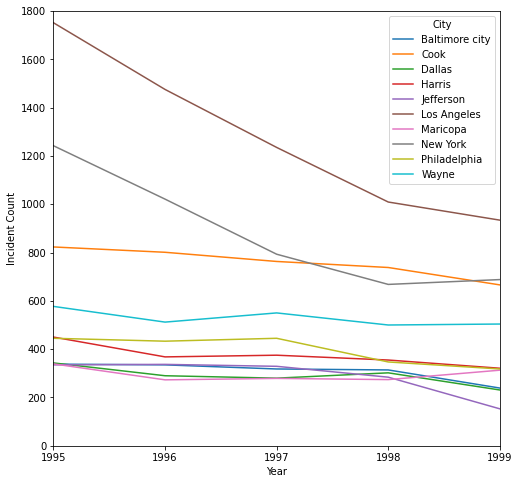

In [704]:
plt.figure(figsize=(8, 8))
plt.ylabel('Incident Count')
plt.axis([1995, 1999, 0, 1800])
plt.xticks(np.arange(1995,2000,1))
sns.lineplot(x='Year', y='Incident', hue='City', data=top_10_cities_years)

__Find the states with the longest streak of consecutive yearly increase in incidents.__  
Example - If state 1 has the following data:  
1990 : 118 incidents  
1991 : 112 incidents  
1992 : 124 incidents  
1993 : 138 incidents  
1994 : 103 incidents  
Then it has a streak of 2 years from 91 to 93.

In [1043]:
#Note: 
#looking for longest streak of years, not for largest amount of incidents increase
#If more than one streak with same length, keeping the first one
def streak_calc(state_incident_list) : 
    max_streak = 0
    current_streak = 0
    end_year_index = len(state_incident_list)
    
    for i in range( 1, len(state_incident_list) ) : 
        #if current element is bigger, then increase the current streak
        if ( state_incident_list[i] > state_incident_list[i-1] ) : 
            current_streak = current_streak + 1 
        #if current streak ended, check if bigger than max we had. Also save position of streak end
        else : 
            if ( max_streak < current_streak ): 
                max_streak = current_streak 
                end_year_index = i-1
            #reset current
            current_streak = 0
    #check for last iteration
    if ( max_streak < current_streak ): 
        max_streak = current_streak

    return (max_streak, end_year_index)

def my_streak_calc(df):
    longest_streak, end_year_streak = streak_calc(df['Incident'].values)
    calculated_streak = pd.DataFrame([[longest_streak, (end_year_streak - longest_streak)]], columns=['Streak', 'Year Start Index'])
    return calculated_streak

In [1052]:
streaks_states = df.groupby(['State','Year'])['Incident'].count().reset_index().sort_values(by=['State','Year','Incident'])

#split by groups of states and apply streak calculation
streaks_data = streaks_states.groupby('State').apply(my_streak_calc)
streaks_data = streaks_data.reset_index().drop(columns=['level_1'])
streaks_data = streaks_data.sort_values('Streak', ascending = False)

print('Max streak', streaks_data['Streak'].max())
#Keep the ones that have max value
streaks_data = streaks_data.head(4)
streaks_data

Max streak 6


,State,Streak,Year Start Index
20,Maryland,6,7
46,Virginia,6,5
2,Arizona,6,9
8,District of Columbia,6,5


__Display a bar count for each of the states you found (Use one figure, but a different axes for each state). x axis should be years and y axis the count of incidents.__

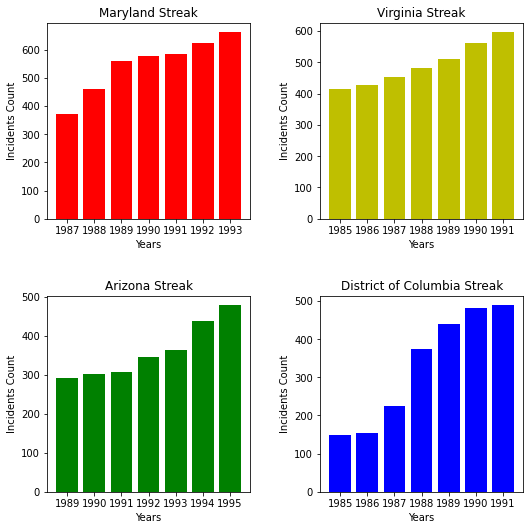

In [1055]:
figure = plt.figure(figsize=(8,8))
colors = 'rygb' #4 selected states, one colour each
for i in range( len( streaks_data['State'] ) ):
    #For each state in streak list, get the start year and build data with incidents count and years from start for a period of found streak length
    mask_state = streaks_states['State'] == streaks_data.iloc[i]['State']
    start_year_index = streaks_data.iloc[i]['Year Start Index']
    state_data = streaks_states[mask_state].iloc[ start_year_index:start_year_index+streaks_data.iloc[i]['Streak']+1 ]

    plt.subplot(2, 2, i+1) #4 selected states, 1 subplot each
    plt.bar(x=state_data['Year'].values , height=state_data['Incident'].values, color=colors[i] )
    plt.title( streaks_data.iloc[i]['State']+' Streak' )
    plt.xlabel('Years') 
    plt.ylabel('Incidents Count') 
    plt.xticks(state_data['Year'].values)
figure.tight_layout(pad=3.0)


__Plot 2 histograms of `Perpetrator Age`, side by side, one for the males and one for the females.__   
Choose the number of bins you see fit.

In [1057]:
df.groupby(['Perpetrator Age','Perpetrator Sex'])['Perpetrator Age'].count()
#There are Unknown Perpetrator Sex, not considering them.
#Many perpetrators with age 0, to discard
#Also, some perpetrators under age 10, will discard them as well due to possibly wrong data

Perpetrator Age  Perpetrator Sex
0                Female                979
                 Male                25022
                 Unknown            185078
1                Female                  2
                 Male                   14
                                     ...  
92               Male                    1
93               Male                    1
95               Male                    1
99               Male                    1
                 Unknown                 2
Name: Perpetrator Age, Length: 435, dtype: int64

In [1058]:
mask_unknown = ( df['Perpetrator Sex'] != 'Unknown' )
mask_age = ( pd.to_numeric(df['Perpetrator Age'], errors='coerce').dropna().astype(int) > 10 )
clean_perpetrators = df[mask_unknown & mask_age]
clean_perpetrators.head(5)

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI


In [1061]:
mask_male = ( clean_perpetrators['Perpetrator Sex'] == 'Male' )
mask_female = ( clean_perpetrators['Perpetrator Sex'] == 'Female' )
male_perpetrators = clean_perpetrators[mask_male]['Perpetrator Age'].astype(int)
female_perpetrators = clean_perpetrators[mask_female]['Perpetrator Age'].astype(int)

print('Male perpetrators max/min age is :', min(male_perpetrators.values),'/', max(male_perpetrators.values))
print('Female perpetrators max/min age is :', min(female_perpetrators.values),'/', max(female_perpetrators.values))


Male perpetrators max/min age is : 11 / 99
Female perpetrators max/min age is : 11 / 99


Text(0, 0.5, 'Amount of perpetrators')

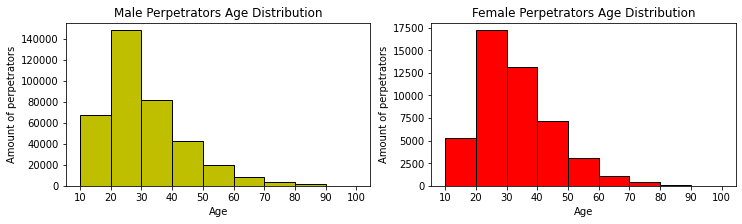

In [1062]:
#histograms using equally distributed bins within the possible Perpetrator Age
figure = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1) 
bins = np.arange(10,101,10)
plt.xticks(bins)
plt.hist(male_perpetrators, bins=bins, color='y', edgecolor='black')
plt.title( 'Male Perpetrators Age Distribution' ) 
plt.xlabel('Age') 
plt.ylabel('Amount of perpetrators')

plt.subplot(1, 2, 2) 
bins = np.arange(10,101,10)
plt.xticks(bins)
plt.hist(female_perpetrators, bins=bins, color='r', edgecolor='black')
plt.title( 'Female Perpetrators Age Distribution' ) 
plt.xlabel('Age') 
plt.ylabel('Amount of perpetrators')

__For each year, find the probability of solving a crime on that year. (number of solved / number of cases). Plot a line plot of the probability you found. x should be years and y the probability.__

In [1063]:
yearly_solved_crimes = df.groupby(['Year'])['Crime Solved'].agg( [ 'count', ('count_solved', lambda x: (x=='Yes').sum() ) ])
yearly_solved_crimes['prob_solved'] = yearly_solved_crimes['count_solved'] / yearly_solved_crimes['count']
yearly_solved_crimes.head()

,count,count_solved,prob_solved
Year,,,
1980,23092,16729,0.724450
1981,21208,15788,0.744436
1982,20544,15060,0.733061
1983,19653,14515,0.738564
1984,18093,13245,0.732051


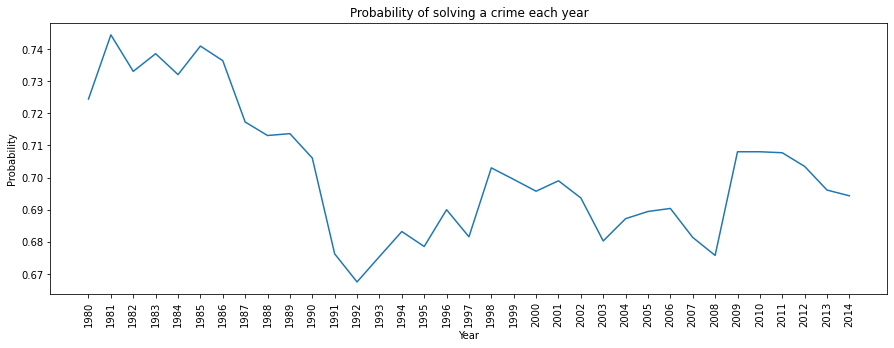

In [1064]:
plt.figure(figsize=(15, 5))
plt.xticks(yearly_solved_crimes.index, rotation=90)
plt.title('Probability of solving a crime each year') 
plt.xlabel('Year') 
plt.ylabel('Probability')
plt.plot(yearly_solved_crimes.index, yearly_solved_crimes['prob_solved'])

__Add another column to the dataframe - `age group`. The value for each row in that column should be the index bin of the `victim age`. We will use 5 bins [0,20], [40, 60] ... [80, 100]. For example, if `victim age` is 12 the value will be 0. If  `victim age` is 42 the value will be 2.
Plot a bar graph of weapon count for each group. Use a single figure and a single axes for the plot.__

(array([637480.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    974.]),
 array([  0. ,  99.8, 199.6, 299.4, 399.2, 499. , 598.8, 698.6, 798.4,
        898.2, 998. ]),
 <BarContainer object of 10 artists>)

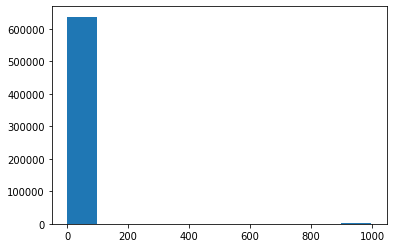

In [1065]:
plt.hist(df['Victim Age'])
#There are some inconsisten Age values, will not consider them for analysis

In [1066]:
bins_victim_steps = [20,40,60,80,100] #define 5 groups, if age is bigger than 100, assign 'NA' group
def assign_age_group(row):
    if ( row['Victim Age'] <= bins_victim_steps[0] ):
        return 0
    elif ( row['Victim Age'] <= bins_victim_steps[1] ):
        return 1
    elif ( row['Victim Age'] <= bins_victim_steps[2] ):
        return 2
    elif ( row['Victim Age'] <= bins_victim_steps[3] ):
        return 3
    elif ( row['Victim Age'] <= bins_victim_steps[4] ):
        return 4
    else:
        return 'NA'

df['Age Group'] = df.apply(assign_age_group, axis='columns')

In [1067]:
weapon_group_age = df.groupby(['Weapon','Age Group'])['Age Group'].count().reset_index(name="weapon_count")
#do not use NA (inconsistent age >100)
mask_age = weapon_group_age['Age Group'] != 'NA'
weapon_group_age = weapon_group_age[mask_age]
weapon_group_age.head(15)

,Weapon,Age Group,weapon_count
0,Blunt Object,0,17086
1,Blunt Object,1,22540
2,Blunt Object,2,16454
3,Blunt Object,3,7695
4,Blunt Object,4,3470
6,Drowning,0,797
7,Drowning,1,265
8,Drowning,2,84
9,Drowning,3,26
10,Drowning,4,31


<AxesSubplot:title={'center':'Weapon count per victim age group'}, xlabel='Age Group', ylabel='weapon_count'>

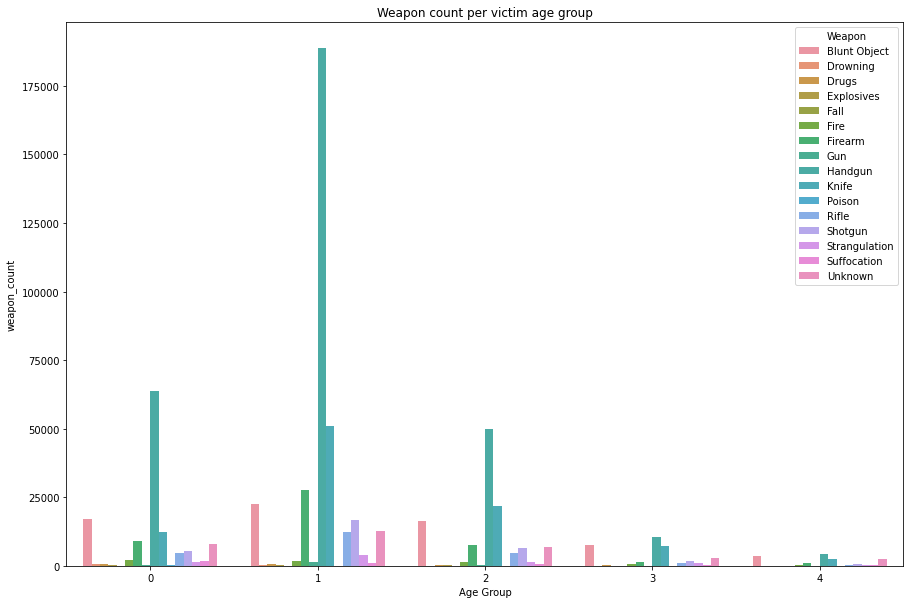

In [1088]:
plt.figure(figsize=(15, 10))
plt.title('Weapon count per victim age group') 
plt.xlabel('Weapon') 
plt.ylabel('Count incidents')
sns.barplot(x='Age Group', y='weapon_count', hue='Weapon', data=weapon_group_age)

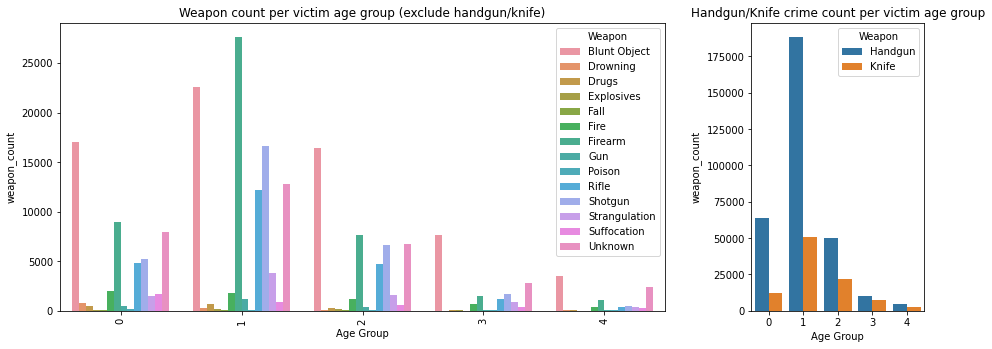

In [1101]:
#There are too many handgun and knife cases, will remove from plot to be able to appreciate distribution for other weapons
plt.figure(figsize=(12, 4))
ax1 = plt.axes([0, 0, 0.7, 1])
plt.xticks(rotation=90)
plt.title('Weapon count per victim age group (exclude handgun/knife)') 
plt.xlabel('Weapon') 
plt.ylabel('Count incidents')
sns.barplot(x='Age Group', y='weapon_count', hue='Weapon', data=weapon_group_age[ (weapon_group_age['Weapon'] != 'Handgun') & (weapon_group_age['Weapon'] != 'Knife') ])

ax2 = plt.axes([0.8, 0, 0.2, 1])
plt.title('Handgun/Knife crime count per victim age group') 
plt.xlabel('Weapon') 
plt.ylabel('Count incidents')
sns.barplot(x='Age Group', y='weapon_count', hue='Weapon', data=weapon_group_age[ (weapon_group_age['Weapon'] == 'Handgun') | (weapon_group_age['Weapon'] == 'Knife') ])

## Playing detective
In the following section you will need to help the police in deciding where they should focus their efforts on. They have 2 cases but they only have the man power to handle one. So, they want to focus on the one with the highest probability of solving. Here is what they know about each case:
- Case 1 : A female aged 36 which was killed using a knife. 
- Case 2 : A male aged 20 which was killed using a handgun.

Here is how we are going to approach the problem : We will compute the conditional probability of each one of the features - `Victim Sex`, `Victim Age` and `Weapon` under 2 options in the Crime Solved columns (yes, no).  
This is a pretty simple procedure. For example, To compute $p(weapon|solved)$ all we have to do is look only at the rows with `Crime solved == Yes` count each weapon and divide by the total number of rows we used. Then we could use this to get $p(weapon=knife|solved)$ and  $p(weapon=handgun|solved)$ (Basically if I asked you what is the probability of using a knife you will count how many times a knife was used and divide it by the number of incidents).  
Once we have those probabilities we will compute $p(female, 36, knife |solved) = p(female|solved) \cdot p(36|solved) \cdot p(knife |solved)$, by assuming that our features are independent. As you will see in the machine learning course this is referred to as the the Naive Bayes assumption.

__Split the dataframe into solved / unsolved.__

In [1071]:
solved_crimes = df[ (df['Crime Solved'] == 'Yes') ]
unsolved_crimes = df[ (df['Crime Solved'] == 'No') ]


__Compute the probability of our each of the features, for each of the dataset separately.  When you complete this task then you computed p(weapon| solved), p(age |solved) , p(victim sex|solved) and p(weapon|unsolved), p(age |unsolved) , p(victim sex|unsolved)__  


In [1072]:
#Solved probabilites

#keeping Unknown sex victims for count
solved_victim_sex = solved_crimes.groupby('Victim Sex')['Victim Sex'].agg(['count'])
solved_victim_sex['prob'] = solved_victim_sex/solved_victim_sex.sum()

#remove age 998 that was inconsistent
age_mask = ( solved_crimes['Victim Age'] != 998 ) 
solved_victim_age = solved_crimes[age_mask].groupby('Victim Age')['Victim Age'].agg(['count'])
solved_victim_age['prob'] = solved_victim_age/solved_victim_age.sum()

#Keeping unknown weapons
solved_weapon = solved_crimes.groupby('Weapon')['Weapon'].agg(['count'])
solved_weapon['prob'] = solved_weapon/solved_weapon.sum()

print( solved_victim_sex )
print(solved_victim_age.head())
print( solved_weapon.head() )


             count      prob
Victim Sex                  
Female      110269  0.246042
Male        337572  0.753220
Unknown        331  0.000739
            count      prob
Victim Age                 
0            7419  0.016568
1            5005  0.011177
2            3485  0.007782
3            2156  0.004815
4            1488  0.003323
              count      prob
Weapon                       
Blunt Object  51504  0.114920
Drowning        999  0.002229
Drugs          1396  0.003115
Explosives      388  0.000866
Fall            166  0.000370


In [1074]:
# Un Solved probabilites

#keeping Unknown sex victims for count
unsolved_victim_sex = unsolved_crimes.groupby('Victim Sex')['Victim Sex'].agg(['count'])
unsolved_victim_sex['prob'] = unsolved_victim_sex/unsolved_victim_sex.sum()

#remove age 998 that was inconsistent
age_mask = ( unsolved_crimes['Victim Age'] != 998 ) 
unsolved_victim_age = unsolved_crimes[age_mask].groupby('Victim Age')['Victim Age'].agg(['count'])
unsolved_victim_age['prob'] = unsolved_victim_age/unsolved_victim_age.sum()

#Keeping unknown weapons
unsolved_weapon = unsolved_crimes.groupby('Weapon')['Weapon'].agg(['count'])
unsolved_weapon['prob'] = unsolved_weapon/unsolved_weapon.sum()


print( unsolved_victim_sex )
print(unsolved_victim_age.head())
print( unsolved_weapon.head() )


             count      prob
Victim Sex                  
Female       33076  0.173826
Male        156553  0.822742
Unknown        653  0.003432
            count      prob
Victim Age                 
0            1025  0.005404
1             520  0.002742
2             320  0.001687
3             222  0.001170
4             171  0.000902
              count      prob
Weapon                       
Blunt Object  15833  0.083208
Drowning        205  0.001077
Drugs           192  0.001009
Explosives      149  0.000783
Fall             24  0.000126


__For each of the cases(1 and 2) above, compute the probability under the solved an unsolved class (4 probabilities in total).__  

In [1084]:

# Case 1 : A female aged 36 which was killed using a knife.
# Case 2 : A male aged 20 which was killed using a handgun.
p_female_36_knife_solved = solved_victim_sex.loc['Female']['prob'] * solved_victim_age.loc[36]['prob'] * solved_weapon.loc['Knife']['prob']
p_male_20_handgun_solved = solved_victim_sex.loc['Male']['prob'] * solved_victim_age.loc[20]['prob'] * solved_weapon.loc['Handgun']['prob']

p_female_36_knife_unsolved = unsolved_victim_sex.loc['Female']['prob'] * unsolved_victim_age.loc[36]['prob'] * unsolved_weapon.loc['Knife']['prob']
p_male_20_handgun_unsolved = unsolved_victim_sex.loc['Male']['prob'] * unsolved_victim_age.loc[20]['prob'] * unsolved_weapon.loc['Handgun']['prob']

print( 'p(Female/36/Knife/solved) =', round( p_female_36_knife_solved ,6 ) )
print( 'p(Male/20/Handgun/solved) =',round( p_male_20_handgun_solved ,6 ) )
print( 'p(Female/36/Knife/unsolved) =', round( p_female_36_knife_unsolved ,6 ) )
print( 'p(Male/20/Handgun/unsolved) =', round( p_male_20_handgun_unsolved ,6 ) )


p(Female/36/Knife/solved) = 0.000812
p(Male/20/Handgun/solved) = 0.012273
p(Female/36/Knife/unsolved) = 0.000354
p(Male/20/Handgun/unsolved) = 0.018238


__Now, report which of the cases has a higher probability of being solved than not solved.__

In [1085]:
#Check the ratio between the solved crimes with stated case characteristics and total cases with those characteristics.
case_1_features_ratio = round( p_female_36_knife_solved / ( p_female_36_knife_solved + p_female_36_knife_unsolved ), 3 )
case_2_features_ratio = round( p_male_20_handgun_solved / ( p_male_20_handgun_solved + p_male_20_handgun_unsolved), 3  )
print('Case 1 - Female/36/Knife - ratio', case_1_features_ratio )
print('Case 2 - Male/20/Handgun - ratio', case_2_features_ratio )

#As per these features, police should focus resources in solving Case 1 
#According to historic data, it has higher probability of being solved than not solved (when compared to Case 2)

Case 1 - Female/36/Knife - ratio 0.696
Case 2 - Male/20/Handgun - ratio 0.402


## End of notebook